# Ejercicio 5


## INTRODUCCION
En este ejercicio se calcula la magnitud absoluta en funcion de la magnitud apartente y el redsfhit. Ademas se ajustan los datos de la envolvente de los puntos, es decir los puntos que contituyen la superficie del plot. El modelo utilizado para realizar este calculo es el siguiente: $$M = m - 25 - 5 \cdot Log(\frac {z \cdot c} {H})$$ 
para  $m < 17.5 $ con $H = 75 \frac {km} {s \cdot M pc} $

## Metodo

En este ejercicio se calculan las magnitudes absolutas con el modelo dado, y se grafican, posteriormente se binea en intervalos equispaciados al redshift y se obtiene el valor maximo de ese binneado, esos dos valores (redshif y magnitud absoluta) se marcan con un color naranja y se ajustan esos puntos con el mismo modelo, logrando asi un ajuste al parametro de las magnitudes aparentes que habia quedado suelto.


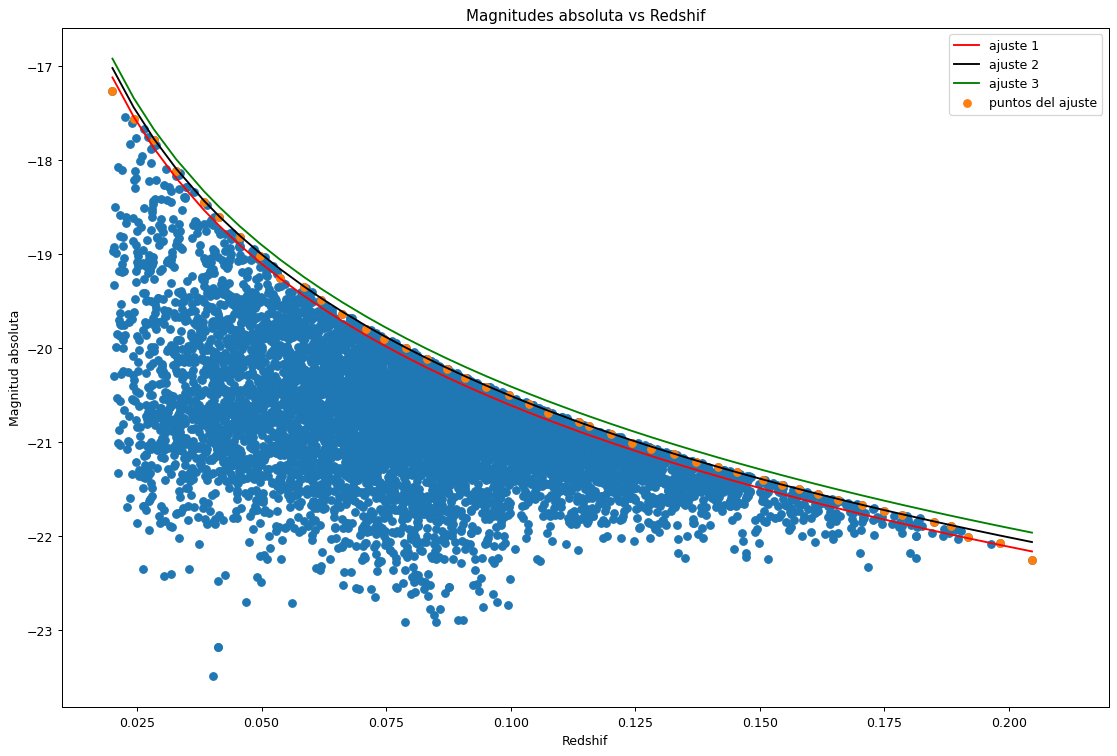

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
import scipy.stats as st

df = pd.read_csv('GUIA3_patricioc.csv')

alpha=0.05

A=df.sort_values(by=['spiral']) 
B=df.loc[df[ 'spiral' ] == 1]
C=df.loc[df[ 'elliptical' ] == 1]


m=df['petroMag_r']
z=df['z']
H = 75
c = 300000
M=[]
z2=[]
m2=[]
for i in range(len(m)):
    if (m[i]<17.5):
        if (z[i]>=0.02):
            z2.append(z[i])
            m2.append(m[i])
            M.append(m[i]-25-5*math.log10(c*z[i]/H))

#ploteo
y = M
x = z2
plt.figure(figsize=(15, 10), dpi=90) #dpi es la resolucion
plt.title('Magnitudes absoluta vs Redshif')
plt.xlabel('Redshif')
plt.ylabel('Magnitud absoluta')

plt.scatter(x,y)

#ajuste de la envolvente
n=70
Mmax=[]
zmax=[]
z_bin = np.linspace(min(z2),max(z2),n)

for j in range(n):
    MM=[]
    zzz=[]
    for i in range(len(z2)):
        
        if (j==n-1):
            break
        else:
            if (z_bin[j]<=z2[i]<z_bin[(j+1)]):
                MM.append(m2[i]-25-5*math.log10(c*z2[i]/H))
                zzz.append(z2[i])
                
    if (len(MM)!=0):
        Mmax.append(max(MM))

        for k in range(len(MM)):
            if (max(MM)==MM[k]):
                zmax.append(zzz[k])

m1=[]
m2=[]
m3=[]
for i in range(len(Mmax)):
    m1.append(17.4-25-5*math.log10(c*zmax[i]/H))
    m2.append(17.5-25-5*math.log10(c*zmax[i]/H))
    m3.append(17.6-25-5*math.log10(c*zmax[i]/H))
                
plt.scatter(zmax, Mmax, label='puntos del ajuste')
#ajuste
plt.plot(zmax,m1,label='ajuste 1',c='r')

plt.plot(zmax,m2,label='ajuste 2',c='black')

plt.plot(zmax,m3,label='ajuste 3',c='green')

plt.legend();
plt.xlim(0.01,0.22)
plt.show()

# CONCLUSION
en el grafico se puede ver como la linea negra es el mejor ajuste, es decir eligiendo las magnitudes aparentes que son 17.5 (el corte propuesto) y como cada una de las magnitudes hace variar esta curva. Esto nos dice que el modelo tomado reproduce curvas logaritmicas donde al variar la magnitud aparente obtenemos los distintos cortes.